In [3]:
import torch
from model import YOLO
from create_dataset import create_image
from torchvision import transforms
from utils import predict

In [2]:
ch = torch.load('./models/checkpoint_9_epochs.pth', map_location=torch.device('cpu'))
model = YOLO(ch['S'], ch['C'], ch['B'], ch['IMG_SIZE'], ch['architecture_config'])
print (model.load_state_dict(ch['state_dict']))

transformer = transforms.Compose([
    transforms.Resize((ch['IMG_SIZE'], ch['IMG_SIZE'])),
    transforms.ToTensor(),
    transforms.Normalize(mean=(.5, .5, .5), std=(.5, .5, .5))
])

<All keys matched successfully>


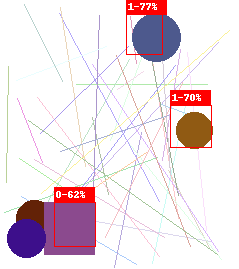

In [12]:
img_pil, bboxs_true = create_image(5)
img_pil, bboxes = predict(model=model, img_pil=img_pil, 
    transformer=transformer, device=torch.device('cpu'), 
    class_threshold=0.6, iou_threshold=0.1, print_grid=False)
img_pil